### Sample Selection

We are selecting a sample of clusters for the phase-space analysis.  One set of criteria is that the clusters have to be in the SDSS and ALFALFA surveys.  A rough cut for the spring sky is

    8h < RA < 16h
    0 < DEC < 30 deg

We also cut the sample based on recession velocity and X-ray luminosity.

    (dat.cz > 6000.) & (dat.logLX > 42.3)
    
    
There is some confusion with A2063 vs. NRGs341.  The Mahdavi catalog says they are the same, but the 

According to NED, here are the position and recession velocity for Abell 2063:

    Abell 2063 15h23m01.8s +08d38m22s GClstr  10474  0.034937 230.7578      8.6394
    
The NED output for RASSCALS NRGs 341 is

    WBL 566    15h23m07.0s +08d36m35s GGroup  10840  0.036160
    
After running this code, run

    getNSAcats
    getAGCcats
    


In [3]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import ascii
%matplotlib inline
datafile='/Users/sandyspicer/Desktop/Phase_Space_Project/mahdavi2000.fits'
dat = fits.getdata(datafile)

In [4]:
dat.columns

ColDefs(
    name = '_RAJ2000'; format = 'D'; unit = 'deg'; disp = 'F8.4'
    name = '_DEJ2000'; format = 'D'; unit = 'deg'; disp = 'F8.4'
    name = 'RASSCALS'; format = '7A'; disp = 'A7'
    name = 'RAJ2000'; format = 'D'; unit = 'deg'; disp = 'F10.4'
    name = 'DEJ2000'; format = 'D'; unit = 'deg'; disp = 'F9.4'
    name = 'N'; format = 'I'; disp = 'I3'
    name = 'N17'; format = 'I'; disp = 'I4'
    name = 'cz'; format = 'J'; unit = 'km/s'; disp = 'I5'
    name = 'e_cz'; format = 'I'; unit = 'km/s'; disp = 'I3'
    name = 'logsigmap'; format = 'E'; unit = '[km/s]'; disp = 'F5.2'
    name = 'e_logsigmap'; format = 'E'; unit = '[km/s]'; disp = 'F5.2'
    name = 'l_logLX'; format = 'A'; disp = 'A1'
    name = 'logLX'; format = 'E'; unit = '[10-7W]'; disp = 'F5.2'
    name = 'e_logLX'; format = 'E'; unit = '[10-7W]'; disp = 'F5.2'
    name = 'n_logLX'; format = 'A'; disp = 'A1'
    name = 'Names'; format = '20A'; disp = 'A20'
)

Here is the code to select the clusters/groups that are in the right RA and Dec range.  They are shown with the red squares in the plot below.

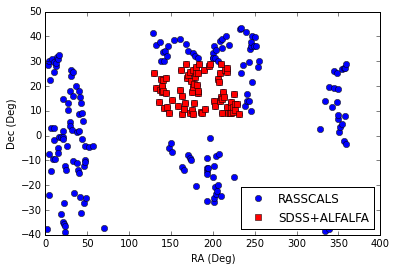

In [5]:
keepflag=(dat.DEJ2000 > 0.) & (dat.DEJ2000 < 30.) & (dat.RAJ2000 > 8.5*15) & (dat.RAJ2000 < 15.5*15)
plt.figure(1)
plt.plot(dat.RAJ2000,dat.DEJ2000,'bo',label='RASSCALS')
plt.plot(dat.RAJ2000[keepflag],dat.DEJ2000[keepflag],'rs',label='SDSS+ALFALFA')
plt.xlabel('RA (Deg)')
plt.ylabel('Dec (Deg)')
plt.legend(numpoints=1,loc='lower right')

Now let's look at the redshift and the X-ray luminosity for the groups/clusters that make the RA/Dec cut.

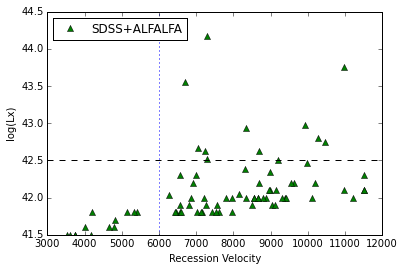

In [6]:
plt.figure(2)
plt.plot(dat.cz[keepflag],dat.logLX[keepflag],'g^',label='SDSS+ALFALFA')
plt.xlabel('Recession Velocity')
plt.ylabel('log(Lx)')
plt.legend(loc='upper left',numpoints=1)
plt.axhline(y=42.5,ls='--',color='k')
plt.axvline(x=6000,ls=':',color='b')

We want to apply 2 additional selection criteria.  First, we want to eliminate clusters with recession velocities less than 6000 km/s using the following cut:$$ v_r < 6000 \ \rm km/s$$  This is because the SDSS photometry can be unreliable for the nearest galaxies - the automatic reduction software sometimes divides big galaxies into several sources.  

Second, we want to select the most X-ray luminous clusters.  These will be the most massive clusters and will have the best chance of showing a well-defined phase-space diagram.  As a result, we apply the following cut: $$ log_{10}(L_X) > 42.5 $$
The luminosity that we are using is a bit arbitrary at this point and was selected so that we would end up with $\sim 10$ clusters.

In [7]:
sampleflag = keepflag & (dat.cz > 6000.) & (dat.logLX > 42.3)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


To find out how many clusters make the RA, Dec, cz and logLX cut, we sum sampleflag.  We find that **12 clusters remain** from the Mahdavi & Geller 2000 sample.  The names and RASSCALS ids of the clusters are listed below.

In [8]:
sum(sampleflag)

15

In [9]:
names=dat.Names[sampleflag]
rnames = dat.RASSCALS[sampleflag]
RA=dat.RAJ2000[sampleflag]
Dec=dat.DEJ2000[sampleflag]
vr=dat.cz[sampleflag]
lx=dat.logLX[sampleflag]
for i in range(len(names)):
    print '%11s %11s %5.2f'%(names[i],rnames[i],lx[i])

       MGBR     NRGb004 42.94
                NRGs027 42.62
                NRGs038 42.47
                NRGs076 42.34
                NRGs090 42.80
      A1137     NRGs110 42.75
 A1185/MGBR     NRGs117 42.98
 HCG51/MGBR     NRGb128 42.39
      A1367     NRGb155 43.55
                NRGb177 42.52
       COMA     NRGb226 44.17
ZM5129/MGBR     NRGb244 42.63
 MKW11/MGBR     NRGb247 42.67
       MGBR     NRGs317 42.51
      A2063     NRGs341 43.75


### NED and SDSS Searches

To search for a particular cluster using NED or SDSS Navigator, you must specify the cluster name as:

    RASSCALS NRBb 155 

Here is one way to write out your data directly into a latex table.

### Writing Tables in Latex

In [8]:
sampledat=dat[sampleflag]
# rename column names that have '_' because latex thinks these should be in math mode
ascii.write(sampledat,output='RASSCALS.tex', Writer=ascii.Latex,latexdict=ascii.latex.latexdicts['AA'],caption='RASSCALS Sub-Sample for Phase Space Analysis',include_names=['RASSCALS','Names','RAJ2000','DEJ2000','N','cz','logsigmap','logLX'],formats={'RAJ2000':'%12.4f','DEJ2000':'%12.4f'})

### Writing out RA,Dec and redshift

In [12]:
outfile=open('sample.dat','w')
for i in range(len(rnames)):
    if rnames[i] == 'NRGs341':
        outfile.write('%11s %12.8f %12.8f %5.4f \n'%('Abell2063',230.7578,8.6394,10410))
    else:
        outfile.write('%11s %12.8f %12.8f %5.4f \n'%(rnames[i],RA[i],Dec[i],vr[i]))
outfile.close()